In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [10]:
file_path = "dataset/letter-recognition.csv"
df = pd.read_csv(file_path)

print(df.head())

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [12]:
print(df.describe())

              xbox          ybox         width        height        onpix   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              xbar          ybar          x2bar        y2bar         xybar   \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [13]:
print(df.isna().any())

letter    False
xbox      False
ybox      False
width     False
height    False
onpix     False
xbar      False
ybar      False
x2bar     False
y2bar     False
xybar     False
x2ybar    False
xy2bar    False
xedge     False
xedgey    False
yedge     False
yedgex    False
dtype: bool


In [14]:
print(df['letter'].unique())

['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


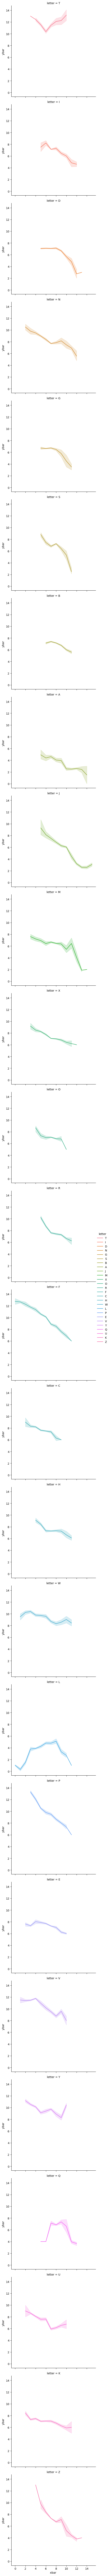

In [22]:
sns.relplot(x='xbar ',y='ybar ',kind='line',data=df, hue='letter', row='letter')
plt.show()

In [23]:
print(df.head())

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


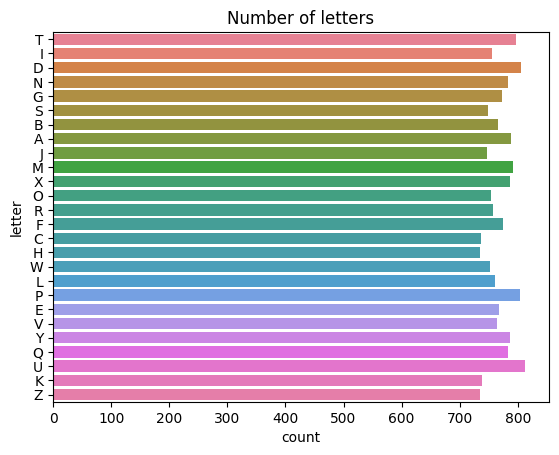

In [28]:
sns.countplot(y='letter', hue='letter', data=df)
plt.title('Number of letters')
plt.show()

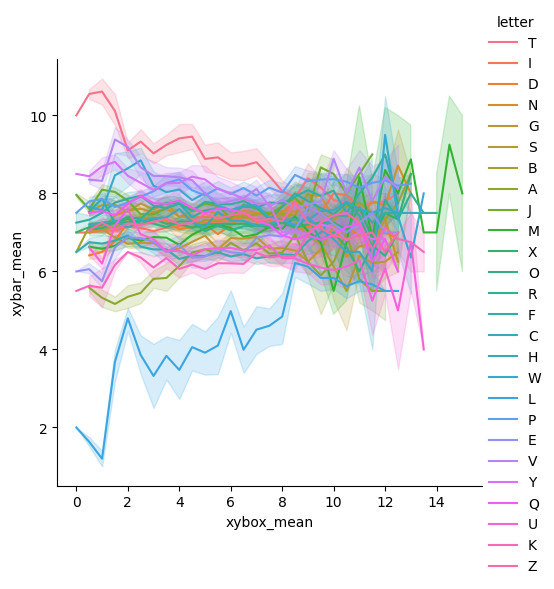

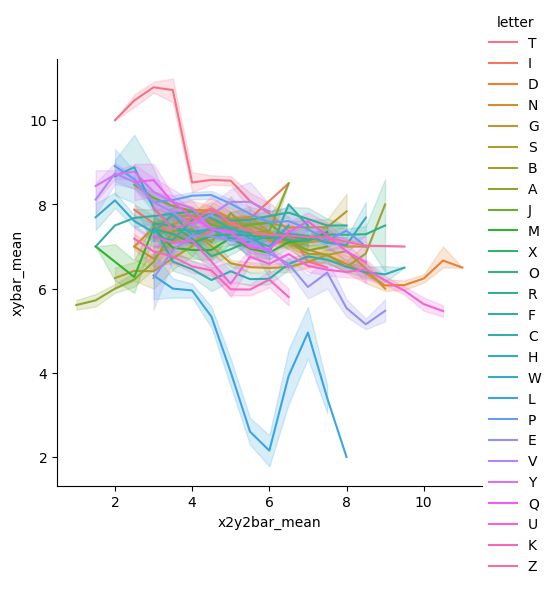

In [ ]:
df['xybox_mean'] = (df['xbox '] + df['ybox ']) / 2
df['xybar_mean'] = (df['xbar '] + df['ybar ']) / 2
df['x2y2bar_mean'] = (df['x2bar'] + df['y2bar ']) / 2
#df['x2yxy2bar_mean'] = (df['x2ybar'] + df['xy2bar ']) / 2
sns.relplot(x='xybox_mean',y='xybar_mean', kind='line', data=df, hue='letter')
plt.show()
sns.relplot(x='x2y2bar_mean',y='xybar_mean', kind='line', data=df, hue='letter')
plt.show()


In [52]:
print(df.head())

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  xybox_mean  \
0       6      10       8       0       8       0       8         5.0   
1      13       3       9       2       8       4      10         8.5   
2      10       3       7       3       7       3       9         7.5   
3       4       4      10       6      10       2       8         9.0   
4       6       5       9       1       7       5      10         1.5   

   xybar_mean  x2y2bar_mean  
0        10.5           3.0  
1         7.5           4.

In [53]:
df = df.drop(columns=['xybox_mean','xybar_mean','x2y2bar_mean'])
print(df.head())

  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


In [54]:
X = df.drop(columns='letter')
y = df['letter']
print(X.shape, y.shape)

(20000, 16) (20000,)
